## Homework3: Improve/evaluate/interpret your midterm project

This is not a group project. This is an individual's two weeks homework

### Your tasks


1. Data cleaning and preparation. Be careful with those missing data and outliers.
2. Use the feature engineering techniques to create 10 new features and give your rationals. It can be common sense, or statistics or by any techniques in last class.
3. Use your new features to predict the home price. You will use RandomForestRegressor as shown in the class.
4. Try different new features to improve the model performance. Choose the appropriate performance matrics. Show your improvement.
5. Use Shapley summary plot to explain your model.
6. Submit all in a Jupyter file and HTML format on canvas

In [188]:
import numpy as np
import pandas as pd

##### Read in the data

In [189]:
train_data = pd.read_csv("data/train.csv")

In [190]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [191]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Seperating numerical and categorical column names

In [192]:
numerical_data = train_data.describe().columns
categorical_data_column_names = set(train_data.columns)-set(numerical_data) 

##### Hot Encoded categorical data

In [194]:
from sklearn.preprocessing import OneHotEncoder
for cat_name in categorical_data_column_names:
    print(cat_name)
    cat = pd.DataFrame(train_data[cat_name])
    enc = OneHotEncoder()
    #need to be given as data frame
    enc.fit(cat)
    X_enc = enc.transform(cat).toarray()
    X_enc
    df = pd.DataFrame(X_enc,columns=enc.get_feature_names(cat.columns))
    train_data = train_data.join(df)
    train_data.drop(cat_name,axis=1,inplace=True)

GarageQual
Alley
BsmtFinType2
BsmtFinType1
Fence
SaleType
Foundation
RoofStyle
HouseStyle
HeatingQC
LotConfig
BldgType
LandContour
Exterior2nd
BsmtCond
ExterCond
Electrical
SaleCondition
MSZoning
LotShape
MiscFeature
PavedDrive
BsmtQual
GarageFinish
CentralAir
GarageCond
Exterior1st
KitchenQual
ExterQual
PoolQC
LandSlope
RoofMatl
Heating
Condition2
Condition1
FireplaceQu
GarageType
Street
Utilities
BsmtExposure
Neighborhood
Functional
MasVnrType


In [195]:
train_data["LotFrontage"].fillna(train_data["LotFrontage"].mode()[0],inplace=True)
train_data["MasVnrArea"].fillna(0,inplace=True)

##### Drop NA values

In [196]:
train_data = train_data.dropna()

In [197]:
checker = train_data.isnull().sum()/len(train_data)*100
checker[checker > 0]

Series([], dtype: float64)

In [198]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Columns: 306 entries, Id to MasVnrType_nan
dtypes: float64(271), int64(35)
memory usage: 3.2 MB


In [199]:
train_data[numerical_data_column_names]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [200]:
train_data[numerical_data_column_names].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,...,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,731.879623,56.022480,68.730964,10695.812183,6.187092,5.577955,1972.958666,1985.435098,108.364757,455.578680,...,97.456853,47.276287,21.039159,3.609862,15.945613,2.920957,42.889050,6.334300,2007.812183,185479.51124
std,421.059059,41.026897,22.316778,10214.702133,1.345780,1.081031,29.379883,20.444852,184.195220,459.691379,...,126.699192,65.210465,60.535107,30.154682,57.249593,41.335545,501.613931,2.696674,1.330221,79023.89060
min,1.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.00000
25%,366.500000,20.000000,60.000000,7741.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,134000.00000
50%,734.000000,50.000000,64.000000,9591.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,400.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167500.00000
75%,1094.500000,70.000000,79.000000,11708.500000,7.000000,6.000000,2001.000000,2004.000000,170.500000,732.000000,...,171.000000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217750.00000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.00000


##### Handling Outliers

In [201]:
outlier_column_names = ["LotFrontage","LotArea","SalePrice"]

60.0 79.0 19.0
7820.0 11500.0 3680.0
133800.0 214000.0 80200.0


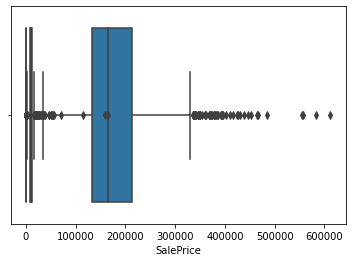

In [202]:
for column_names in outlier_column_names:
    import seaborn as sns
    sns.boxplot(x=train_data[column_names])
    upper_lim = train_data[column_names].quantile(.95)
    lower_lim = train_data[column_names].quantile(.05) # Top 5% means here the values that are out of the 95th percentile of data
    train_data[(train_data[column_names] < upper_lim) & (train_data[column_names] > lower_lim)]
    Q1 = train_data[column_names].quantile(0.25)
    Q3 = train_data[column_names].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1, Q3, IQR)
    train_data = train_data[(train_data[column_names] < (Q3 + 1.5 * IQR)) & (train_data[column_names] > (Q1 - 1.5 * IQR))]








In [203]:
train_data[numerical_data_column_names].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,...,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,733.473368,53.436426,66.716495,9329.644330,6.047251,5.619416,1971.285223,1984.460481,89.534364,418.898625,...,90.793814,43.733677,21.944158,3.083333,15.760309,1.497423,42.168385,6.348797,2007.803265,172674.658076
std,421.368832,37.468867,14.200155,2751.804354,1.228216,1.083132,29.640832,20.677917,156.323632,399.456800,...,119.469077,61.839399,59.876265,28.663387,56.901736,29.592111,488.254848,2.708921,1.325699,55941.702137
min,1.000000,20.000000,32.000000,2448.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,368.750000,20.000000,60.000000,7672.250000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,132500.000000
50%,740.500000,50.000000,63.000000,9274.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162700.000000
75%,1096.500000,70.000000,76.000000,11031.750000,7.000000,6.000000,2000.000000,2003.000000,146.250000,690.000000,...,168.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,205000.000000
max,1460.000000,190.000000,107.000000,16770.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,1880.000000,...,736.000000,547.000000,386.000000,508.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,328900.000000


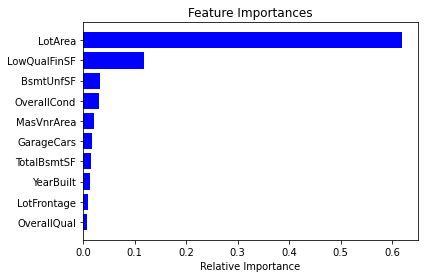

In [204]:
x = train_data.drop(["Id","SalePrice"],axis=1)
y = train_data["SalePrice"]
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt
model = RandomForestRegressor(random_state=1,max_depth=10)
model.fit(x,y)
dict_importantance = dict(reversed(sorted(zip(model.feature_importances_, train_data.columns.values))))
features = train_data.drop(["SalePrice"],axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [205]:
random_for_ftr = [features[i] for i in indices]
random_for_ftr

['OverallQual',
 'LotFrontage',
 'YearBuilt',
 'TotalBsmtSF',
 'GarageCars',
 'MasVnrArea',
 'OverallCond',
 'BsmtUnfSF',
 'LowQualFinSF',
 'LotArea']

In [221]:
train_data.drop("Id",axis=1,inplace=True)

In [222]:
from sklearn.preprocessing import StandardScaler
variables = train_data.columns
x = train_data.loc[:, variables].values
y = train_data.loc[:,['SalePrice']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,300,301,302,303,304
0,0.175249,-0.120931,-0.319798,0.776052,-0.572121,1.070429,0.896971,0.681352,0.719038,-0.296896,...,-0.148152,-0.159846,-0.093089,0.0,0.260557,-0.102062,1.485467,-1.219500,-0.284218,-0.071982
1,-0.892762,0.935850,0.098289,-0.038488,2.198817,0.159132,-0.409331,-0.572996,1.400256,-0.296896,...,-0.148152,-0.159846,-0.093089,0.0,0.260557,-0.102062,-0.673189,0.820008,-0.284218,-0.071982
2,0.175249,0.090426,0.698153,0.776052,-0.572121,1.002926,0.848589,0.463761,0.168054,-0.296896,...,-0.148152,-0.159846,-0.093089,0.0,0.260557,-0.102062,1.485467,-1.219500,-0.284218,-0.071982
3,0.442252,-0.473191,0.080111,0.776052,-0.572121,-1.899725,-0.699621,-0.572996,-0.508155,-0.296896,...,-0.148152,-0.159846,-0.093089,0.0,0.260557,-0.102062,-0.673189,0.820008,-0.284218,-0.071982
4,0.175249,1.217658,1.792451,1.590591,-0.572121,0.969174,0.751826,1.666911,0.591310,-0.296896,...,-0.148152,-0.159846,-0.093089,0.0,0.260557,-0.102062,1.485467,-1.219500,-0.284218,-0.071982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,0.175249,-0.332287,-0.513573,-0.038488,-0.572121,0.935422,0.751826,-0.572996,-1.049121,-0.296896,...,-0.148152,-0.159846,-0.093089,0.0,0.260557,-0.102062,-0.673189,0.820008,-0.284218,-0.071982
1160,-0.892762,1.288110,1.397995,-0.038488,0.351525,0.226635,0.171247,0.188572,0.929414,0.750864,...,6.749815,-0.159846,-0.093089,0.0,-3.837933,-0.102062,-0.673189,-1.219500,3.518424,-0.071982
1161,0.442252,-0.050479,-0.104574,0.776052,3.122462,-1.022179,1.042115,-0.572996,-0.360391,-0.296896,...,-0.148152,-0.159846,-0.093089,0.0,0.260557,-0.102062,-0.673189,0.820008,-0.284218,-0.071982
1162,-0.892762,0.090426,0.140825,-0.853027,0.351525,-0.718413,0.558300,-0.572996,-0.926402,6.317491,...,-0.148152,-0.159846,-0.093089,0.0,0.260557,-0.102062,-0.673189,0.820008,-0.284218,-0.071982


In [223]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,295,296,297,298,299,300,301,302,303,304
0,-4.679879,1.201563,0.223678,-0.013502,-2.911197,0.326804,-0.374927,1.427432,-0.093225,-0.420986,...,-1.669489e-16,1.869750e-16,-1.894231e-16,-2.444267e-16,3.051737e-17,2.282576e-16,5.804379e-17,2.997125e-16,2.218801e-16,4.497761e-17
1,-0.243682,-3.285015,-0.386924,-0.125807,-0.188883,1.101138,0.336919,-0.006819,-0.461171,-1.065719,...,2.902289e-16,4.525207e-16,4.645127e-17,9.338804e-17,-3.888594e-16,2.220452e-17,2.435527e-16,-2.342297e-17,-7.015847e-18,1.429780e-16
2,-5.545786,0.710181,0.118592,1.204684,-2.373183,0.706495,0.621881,1.920555,-0.170510,-0.416137,...,-3.452652e-16,1.719264e-16,-4.573242e-16,-6.568155e-16,6.415602e-16,-1.653168e-16,1.045985e-16,2.233140e-16,-4.656079e-17,6.810948e-17
3,1.838643,1.775857,-1.121555,2.037419,-0.079222,-0.491578,1.974883,-0.565055,-0.637079,-0.022268,...,-1.709147e-16,3.678991e-16,5.183273e-16,-1.816737e-16,-1.241443e-16,-8.117674e-18,-2.835702e-16,1.613445e-16,-7.573157e-17,-5.593822e-17
4,-7.286193,0.525215,0.041082,3.996851,-1.419562,0.774659,0.185266,1.986990,0.565269,-1.305382,...,1.781950e-16,-8.777195e-16,-1.010054e-16,5.075712e-16,2.993498e-16,-3.819497e-16,2.660991e-16,1.529525e-16,-1.438605e-16,2.944710e-17


In [224]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.58066989e-02, 3.10074601e-02, 2.65873986e-02, 2.24825449e-02,
       1.74339943e-02, 1.54123317e-02, 1.39321881e-02, 1.37788080e-02,
       1.29153760e-02, 1.26148450e-02, 1.16790000e-02, 1.15170385e-02,
       1.12352427e-02, 1.07419110e-02, 1.03343974e-02, 1.02408792e-02,
       1.00943623e-02, 9.71760206e-03, 9.39992286e-03, 9.28518057e-03,
       9.07176559e-03, 8.91054077e-03, 8.82661938e-03, 8.70803426e-03,
       8.51784402e-03, 8.30588673e-03, 8.22259901e-03, 8.06068939e-03,
       7.82012241e-03, 7.75085360e-03, 7.72656258e-03, 7.55030918e-03,
       7.45923389e-03, 7.36961643e-03, 7.13212414e-03, 7.06392663e-03,
       6.92615143e-03, 6.91392462e-03, 6.78541419e-03, 6.66264032e-03,
       6.60024265e-03, 6.40673204e-03, 6.36441390e-03, 6.21081375e-03,
       6.13524012e-03, 6.05960717e-03, 5.93208330e-03, 5.89548172e-03,
       5.84892234e-03, 5.83346369e-03, 5.71522440e-03, 5.64701857e-03,
       5.50773211e-03, 5.46447550e-03, 5.44346851e-03, 5.33442846e-03,
      

In [225]:
np.cumsum(pca.explained_variance_ratio_)

array([0.0658067 , 0.09681416, 0.12340156, 0.1458841 , 0.1633181 ,
       0.17873043, 0.19266262, 0.20644142, 0.2193568 , 0.23197165,
       0.24365065, 0.25516768, 0.26640293, 0.27714484, 0.28747924,
       0.29772011, 0.30781448, 0.31753208, 0.326932  , 0.33621718,
       0.34528895, 0.35419949, 0.36302611, 0.37173414, 0.38025199,
       0.38855787, 0.39678047, 0.40484116, 0.41266128, 0.42041214,
       0.4281387 , 0.43568901, 0.44314824, 0.45051786, 0.45764998,
       0.46471391, 0.47164006, 0.47855399, 0.4853394 , 0.49200204,
       0.49860228, 0.50500902, 0.51137343, 0.51758424, 0.52371948,
       0.52977909, 0.53571117, 0.54160666, 0.54745558, 0.55328904,
       0.55900427, 0.56465128, 0.57015902, 0.57562349, 0.58106696,
       0.58640139, 0.5916434 , 0.59687218, 0.60201598, 0.60712745,
       0.6122164 , 0.61725644, 0.62222776, 0.62713107, 0.63198988,
       0.63678896, 0.64154739, 0.64628941, 0.65099574, 0.65565168,
       0.6602356 , 0.66477103, 0.66925602, 0.67370185, 0.67806

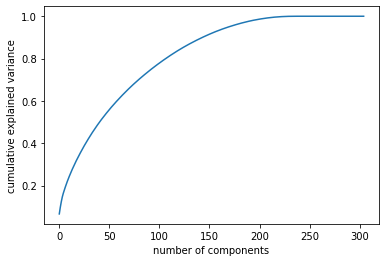

In [226]:
plt.plot(list(range(0,len(np.cumsum(pca.explained_variance_ratio_)))), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [236]:
trial = train_data.iloc[:,list(range(0,200))]
trial

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [237]:
x = trial.values
y = train_data["SalePrice"]

##### Decision Tree

In [246]:
from sklearn import tree
from sklearn.model_selection import train_test_split
# x = train_data[random_for_ftr]
# y = train_data["SalePrice"]
x = trial.values
y = train_data["SalePrice"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
clf = tree.DecisionTreeRegressor().fit(x_train,y_train)
y_pred = clf.predict(x_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 483.13428571428574
Mean Squared Error: 1148732.1057142857
Root Mean Squared Error: 1071.7892076869807
R-squared Error: 0.999641243227449


In [245]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
957,132000,131500.0
126,128000,128000.0
974,167500,168500.0
845,171000,171900.0
950,129000,129000.0
